# Unsupervised Clustering on the MIMIC III database - queried for acute kidney injury dianosis

### Sina Dabiri
### sdabiri@emory.edu
#### Version 1.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# For this clustering project, the scikit learn PCA is going to be used from the decomposition library.
from sklearn import decomposition

In [3]:
"""
The kidney csv has been put in the project folder. The source of the MIMIC III is: 

https://physionet.org/content/mimiciii/1.4/
"""
kidney_df = pd.read_csv("KIDNEY.csv")
kidney_df

,subject_id,age_group,icd9_code,itemid,label,valuenum,itemid-2,label-2,value
0,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,0.0
1,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,5.0
2,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,7.0
3,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,10.0
4,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,12.0
...,...,...,...,...,...,...,...,...,...
2352,32446,adult,5849,51081,"Creatinine, Serum",2.8,40055,Urine Out Foley,270.0
2353,32446,adult,5849,51081,"Creatinine, Serum",2.8,40055,Urine Out Foley,300.0
2354,32446,adult,5849,51081,"Creatinine, Serum",2.8,40055,Urine Out Foley,320.0
2355,32446,adult,5849,51081,"Creatinine, Serum",2.8,40055,Urine Out Foley,380.0


In [6]:
kidney_df_rn = kidney_df.rename(columns={"valuenum":"Creatine", "value":"Urine"})
kidney_df_rn


,subject_id,age_group,icd9_code,itemid,label,Creatine,itemid-2,label-2,Urine
0,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,0.0
1,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,5.0
2,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,7.0
3,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,10.0
4,781,adult,5849,51081,"Creatinine, Serum",0.9,40055,Urine Out Foley,12.0
...,...,...,...,...,...,...,...,...,...
2352,32446,adult,5849,51081,"Creatinine, Serum",2.8,40055,Urine Out Foley,270.0
2353,32446,adult,5849,51081,"Creatinine, Serum",2.8,40055,Urine Out Foley,300.0
2354,32446,adult,5849,51081,"Creatinine, Serum",2.8,40055,Urine Out Foley,320.0
2355,32446,adult,5849,51081,"Creatinine, Serum",2.8,40055,Urine Out Foley,380.0


In [7]:
# Look for general stats and missing info
kidney_df_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  2357 non-null   int64  
 1   age_group   2357 non-null   object 
 2   icd9_code   2357 non-null   int64  
 3   itemid      2357 non-null   int64  
 4   label       2357 non-null   object 
 5   Creatine    2357 non-null   float64
 6   itemid-2    2357 non-null   int64  
 7   label-2     2357 non-null   object 
 8   Urine       2338 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 165.9+ KB


In [9]:
# Dividing the dataset into it's X features and their true label Y
X = kidney_df_rn[['subject_id', 'Creatine', 'Urine']]
X

,subject_id,Creatine,Urine
0,781,0.9,0.0
1,781,0.9,5.0
2,781,0.9,7.0
3,781,0.9,10.0
4,781,0.9,12.0
...,...,...,...
2352,32446,2.8,270.0
2353,32446,2.8,300.0
2354,32446,2.8,320.0
2355,32446,2.8,380.0


In [13]:
X = X.dropna()
X

,subject_id,Creatine,Urine
0,781,0.9,0.0
1,781,0.9,5.0
2,781,0.9,7.0
3,781,0.9,10.0
4,781,0.9,12.0
...,...,...,...
2351,32446,2.8,250.0
2352,32446,2.8,270.0
2353,32446,2.8,300.0
2354,32446,2.8,320.0


### Unsupervised Clustering


In [10]:
# For this clustering project, the scikit learn PCA is going to be used from the decomposition library.
from sklearn import decomposition

In [14]:
# Principal Component Analysis (PCA): dimentionally reducing the data to two principal components that discribe most of the variation. Fitting the X dataframe using PCA.
pca = decomposition.PCA(n_components=2)
pca.fit(X[['Creatine', 'Urine']])

PCA(n_components=2)

In [15]:

# Printing out the two highest variances.
print(pca.explained_variance_)

[3.08402003e+04 2.41766523e+00]


In [16]:
# Transforming the X dataframe to the coordinate of the two principal components (PC1, PC2).
X_reduced = pca.fit_transform(X)
X_reduced.shape

(2338, 2)

In [33]:
AKI1 = X['Creatine']<2.0
AKI2 = X['Creatine']>2.0  
AKI2

0       False
1       False
2       False
3       False
4       False
        ...  
2351     True
2352     True
2353     True
2354     True
2355     True
Name: Creatine, Length: 2338, dtype: bool

In [34]:
Y = pd.Series(data=0, index=X.index)
Y[AKI1] = 1
Y[AKI2] = 2
Y

0       1
1       1
2       1
3       1
4       1
       ..
2351    2
2352    2
2353    2
2354    2
2355    2
Length: 2338, dtype: int64

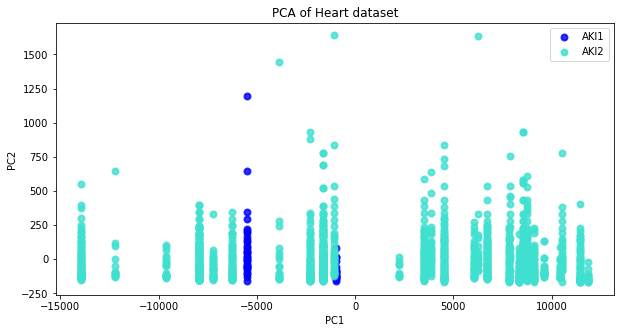

In [35]:
# Scatter plotting the two classes of Alive/Dead on the PC1 and PC2
plt.figure(figsize=(10,5))
colors = ['blue', 'turquoise']
target_names = ['AKI1', 'AKI2']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_reduced[Y == i, 0], X_reduced[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Acute Kidney Injury');